## Практикум по Pandas

In [1]:
import pandas as pd
import numpy as np

In [2]:
# метод aggregate появился в версии Pandas 0.20.0
# если выдается ошибка AttributeError: 'DataFrame' object has no attribute 'aggregate', то надо обновить Pandas:
# conda update pandas
# или conda update conda

In [3]:
# если вы запускаете notebook в другом ядре (например, питон 3.6 при основной версии питона на компьютере 2.7), то
# обновляем версию Pandas для этого ядра:
# смотрим какие ядра установлены: conda info --envs
# активируем нужное ядро: source activate python3 (в Windows команда без source)
# обновляем Pandas: conda update pandas

In [4]:
# проверяем версию Pandas
pd.__version__

'0.24.2'

### Создание DataFrame из листов и словарей

In [5]:
dataList = [
    { 'date': '2017-07-01', 'value': 100 },
    { 'date': '2017-07-02', 'value': 200 },
    { 'date': '2017-07-03', 'value': 300 },
    { 'date': '2017-07-04', 'value': 400 },
    { 'date': '2017-07-05', 'value': 500 },
]

In [6]:
pd.DataFrame( dataList )

,date,value
0,2017-07-01,100
1,2017-07-02,200
2,2017-07-03,300
3,2017-07-04,400
4,2017-07-05,500


In [7]:
# то же самое, но в другом виде
# задаем столбцы

dataDict = {
    'date': [ '2017-07-01', '2017-07-02', '2017-07-03', '2017-07-04', '2017-07-05' ],
    'value': [ 100, 200, 300, 400, 500 ]
}

pd.DataFrame.from_dict( dataDict )

,date,value
0,2017-07-01,100
1,2017-07-02,200
2,2017-07-03,300
3,2017-07-04,400
4,2017-07-05,500


In [8]:
# для сохранения порядка следования элементов можем использовать лист вместо словаря

dataDict = [
    ( 'date', [ '2017-07-01', '2017-07-02', '2017-07-03', '2017-07-04', '2017-07-05' ] ),
    ( 'value', [ 100, 200, 300, 400, 500 ] )
]

pd.DataFrame.from_items( dataDict )

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  


,date,value
0,2017-07-01,100
1,2017-07-02,200
2,2017-07-03,300
3,2017-07-04,400
4,2017-07-05,500


In [9]:
# лист кортежей с указанием заголовков
dataLists = [
    ('2017-07-01', 100),
    ('2017-07-02', 200),
    ('2017-07-03', 300),
    ('2017-07-04', 400),
    ('2017-07-05', 500),
]

headers = [ 'date', 'value' ]
pd.DataFrame.from_records( dataLists, columns = headers )

,date,value
0,2017-07-01,100
1,2017-07-02,200
2,2017-07-03,300
3,2017-07-04,400
4,2017-07-05,500


### Создание Series

In [10]:
# можно использовать Numpy для генерации данных
dataNP = np.random.rand( 3 )

In [11]:
dataNP

array([0.81448548, 0.28282329, 0.93179562])

In [12]:
pd.Series( dataNP, index = [ 'first', 'second', 'third' ] )

first     0.814485
second    0.282823
third     0.931796
dtype: float64

### Импорт данных для DataFrame из файлов

In [13]:
data = pd.read_csv('train.csv', delimiter=',')

In [14]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [15]:
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html#pandas.read_csv
# указываем разделитель столбцов в файле
# заголовок у файла есть, но можно задать свои названия (удобно, если изначально они на русском)
# выводим первые 10 строк

data = pd.read_csv( 'train.csv', delimiter = ',' )
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [16]:
data.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [17]:
# основная информация о нашем DataFrame
# хорошо показывает в каких данных много пропусков
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Столбцы SibSp и Parch (наличие родственников среди пассажиров) распознаны как целое число. Если надо это исправить, то используем dtype:

In [18]:
data = pd.read_csv( 'train.csv', delimiter = ',', dtype = {'SibSp': str, 'Parch': str} )
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null object
Parch          891 non-null object
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(3), object(7)
memory usage: 83.6+ KB


In [19]:
# статистика DataFrame
# вывод зависит от типа данных
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html

data.describe()

,PassengerId,Survived,Pclass,Age,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,32.204208
std,257.353842,0.486592,0.836071,14.526497,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,512.329200


### Распределение значений столбца

In [20]:
type(data['Pclass'])

pandas.core.series.Series

In [21]:
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

### Гистограмма распределения

In [22]:
# рисуем в браузере
%matplotlib inline

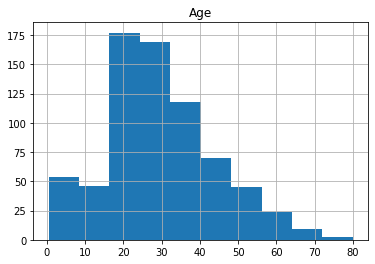

In [23]:
data.hist( column = ['Age'] );

Можно и так:

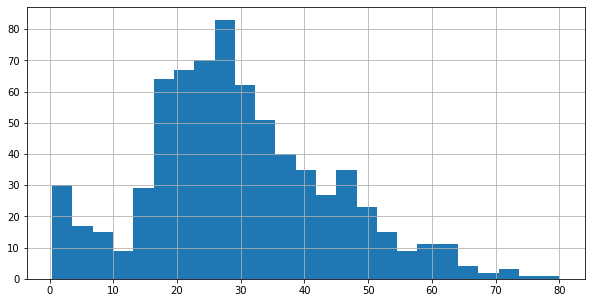

In [24]:
data['Age'].hist(bins = 25, figsize = (10, 5))

### Упражнение

Загрузите в датафрейм mountains содержимое файла Mountains.csv. Посчитайте следующие показатели:
1. Минимальную и максимальную высоту гор в этом наборе

2. В каком году было впервые покорено наибольшее количество вершин (столбец First ascent)?

3. Постройте распределение распределение First ascent по годам

### by guryanoffilya*


In [25]:
df = pd.read_csv('Homework/Mountains.csv')

In [26]:
df.head()

,Rank,Mountain,Height (m),Height (ft),Prominence (m),Range,Coordinates,Parent mountain,First ascent,Ascents bef. 2004,Failed attempts bef. 2004
0,1,Mount Everest / Sagarmatha / Chomolungma,8848,29029,8848,Mahalangur Himalaya,27°59′17″N 86°55′31″E﻿,NaN,1953,>>145,121.0
1,2,K2 / Qogir / Godwin Austen,8611,28251,4017,Baltoro Karakoram,35°52′53″N 76°30′48″E﻿,Mount Everest,1954,45,44.0
2,3,Kangchenjunga,8586,28169,3922,Kangchenjunga Himalaya,27°42′12″N 88°08′51″E﻿,Mount Everest,1955,38,24.0
3,4,Lhotse,8516,27940,610,Mahalangur Himalaya,27°57′42″N 86°55′59″E﻿,Mount Everest,1956,26,26.0
4,5,Makalu,8485,27838,2386,Mahalangur Himalaya,27°53′23″N 87°05′20″E﻿,Mount Everest,1955,45,52.0


In [27]:
df['Height (m)'].max()

8848

In [28]:
df['Height (m)'].min()

7200

In [29]:
df['First ascent'].value_counts().head()

1960    7
1956    6
1976    6
1975    5
1970    4
Name: First ascent, dtype: int64

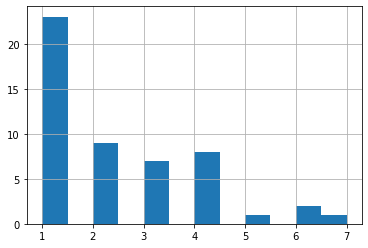

In [30]:
df['First ascent'].value_counts().hist(bins=12);

### Поэлементные действия с DataFrame

In [31]:
# зададим два DataFrame

df1 = pd.DataFrame( [ (0, 1), (2, 3), (4, 5) ], columns = [ 'value1', 'value2' ] )
df1

,value1,value2
0,0,1
1,2,3
2,4,5


In [73]:
df2 = pd.DataFrame( [ (10, 11), (12, 13), (14, 15), (17, 18) ], columns = [ 'value1', 'value3' ] )
df2

,value1,value3
0,10,11
1,12,13
2,14,15
3,17,18


In [74]:
# функция сложения
df1.add( df2 )

,value1,value2,value3
0,10.0,NaN,NaN
1,14.0,NaN,NaN
2,18.0,NaN,NaN
3,NaN,NaN,NaN


In [ ]:
# для несовпадающих строк используем значение из fill_value
df1.add( df2, fill_value = 100 ).fillna(0)

### mul - перемножение

In [75]:
df1.mul( df2, fill_value = 0 )

,value1,value2,value3
0,0.0,0.0,0.0
1,24.0,0.0,0.0
2,56.0,0.0,0.0
3,0.0,NaN,0.0


### div - поэлементное деление DataFrame

In [76]:
df1.div( df2, fill_value = 17 )

,value1,value2,value3
0,0.000000,0.058824,1.545455
1,0.166667,0.176471,1.307692
2,0.285714,0.294118,1.133333
3,1.000000,NaN,0.944444


### Разность DataFrame

In [77]:
df1.sub( df2 )

,value1,value2,value3
0,-10.0,NaN,NaN
1,-10.0,NaN,NaN
2,-10.0,NaN,NaN
3,NaN,NaN,NaN


### Корректное копирование DataFrame

In [ ]:
# зададим DataFrame

df1 = pd.DataFrame( [ (0, 1) ], columns = [ 'value1', 'value2' ] )
df1

In [ ]:
# делаем его "копию"

df2 = df1

In [ ]:
# Изменяем значение ячейки в "копии"

df2['value1'][0] = 555

In [ ]:
df2

Смотрим что произошло с исходным

In [ ]:
df1

Сделаем "настоящую" копию

In [ ]:
df1 = pd.DataFrame( [ (0, 1) ], columns = [ 'value1', 'value2' ] )
df1

In [ ]:
df2 = df1.copy()

In [ ]:
df2['value1'][0] = 555

In [ ]:
df2

In [ ]:
df1

### Сводные таблицы

In [32]:
data = pd.read_csv( 'train.csv', delimiter = ',' )
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pivot.html
# index - значения столбца, которые будут в строках
# columns - значения столбца, которые образуют столбцы
# values - значения в ячейках таблицы
# aggfunc - функция, которая будет применена к значениям

# среднее значение столбца 'Age' в разбивке по Sex и Embarked
pd.pivot_table( data, index = ['Sex', 'Pclass'], columns = ['Embarked'], values = 'Age', aggfunc = np.mean )

Embarked               C          Q          S
Sex    Pclass                                 
female 1       36.052632  33.000000  32.704545
       2       19.142857  30.000000  29.719697
       3       14.062500  22.850000  23.223684
male   1       40.111111  44.000000  41.897188
       2       25.937500  57.000000  30.875889
       3       25.016800  28.142857  26.574766

### Apply - применить функцию в столбцу или строке

In [36]:
data = pd.read_csv( 'train.csv', delimiter = ',' )
data.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [47]:
def ageGroup( row ):
    """
    Простая функция отнесения возраста к группе
    """
    
    # проверяем, что значение возраста не равно NaN
    if not pd.isnull( row['Age'] ):
        if row['Age'] <= 18:
            return 'Child'

        if row['Age'] >= 65:
            return 'Retiree'

        return 'Young'
    
    # если значение возраста NaN, то возвращаем Undef
    return row['Age']

In [48]:
# применим функцию ageGroup к DataFrame и выведем результат в отдельный столбец ageGroup

data['ageGroup'] = data.apply( ageGroup, axis = 1 )
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ageGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Young
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Young
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Young
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,NaN
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Young
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Young
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Child


### Applymap - применяем функцию к каждой ячейке отдельно

In [68]:
# например, устанавливаем формат отображения

df = pd.DataFrame( np.random.randn( 10, 3 ), columns = ['first', 'second', 'third'] )
df

,first,second,third
0,0.369763,0.737522,1.295374
1,0.086215,-0.797014,-0.168916
2,0.463144,-1.711446,0.734814
3,-2.672517,0.169101,-1.266521
4,-0.352013,0.576614,0.028487
5,-0.562345,-1.095295,-0.615689
6,-0.116543,0.281248,0.708613
7,1.408303,-1.103261,-2.798524
8,-0.960313,-1.789236,-0.454689
9,0.935027,1.486263,2.080318


In [69]:
df.apply( lambda x: x**2 )

,first,second,third
0,0.136725,0.543938,1.677995
1,0.007433,0.635232,0.028532
2,0.214503,2.929046,0.539952
3,7.142348,0.028595,1.604075
4,0.123913,0.332484,0.000811
5,0.316232,1.199671,0.379073
6,0.013582,0.079101,0.502132
7,1.983317,1.217185,7.831738
8,0.922200,3.201366,0.206742
9,0.874275,2.208977,4.327721


## Упражнение

Классифицируйте высоту гор и посчитайте распределение количества вершин по этой классификации:
* высота до 7500 метров - High
* до 8000 метров - Very high
* более 8000 метров - Extremely high

In [71]:
mount = pd.read_csv('Homework/Mountains.csv')

In [72]:
mount.head()

,Rank,Mountain,Height (m),Height (ft),Prominence (m),Range,Coordinates,Parent mountain,First ascent,Ascents bef. 2004,Failed attempts bef. 2004
0,1,Mount Everest / Sagarmatha / Chomolungma,8848,29029,8848,Mahalangur Himalaya,27°59′17″N 86°55′31″E﻿,NaN,1953,>>145,121.0
1,2,K2 / Qogir / Godwin Austen,8611,28251,4017,Baltoro Karakoram,35°52′53″N 76°30′48″E﻿,Mount Everest,1954,45,44.0
2,3,Kangchenjunga,8586,28169,3922,Kangchenjunga Himalaya,27°42′12″N 88°08′51″E﻿,Mount Everest,1955,38,24.0
3,4,Lhotse,8516,27940,610,Mahalangur Himalaya,27°57′42″N 86°55′59″E﻿,Mount Everest,1956,26,26.0
4,5,Makalu,8485,27838,2386,Mahalangur Himalaya,27°53′23″N 87°05′20″E﻿,Mount Everest,1955,45,52.0


## За высоту в метрах отвечает Height (m)

In [90]:
def heightOfMountain(row):
    '''Функция классифицирует высоту гор'''
    
    if not pd.isnull( row['Height (m)'] ):
        if row['Height (m)'] > 8000:
            return 'Extremely high'
        elif row['Height (m)'] <= 7500:
            return 'High'
        else:
            return 'Very high'
    else:
        return '0'

In [91]:
mount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 12 columns):
Rank                         118 non-null int64
Mountain                     118 non-null object
Height (m)                   118 non-null int64
Height (ft)                  118 non-null int64
Prominence (m)               118 non-null int64
Range                        118 non-null object
Coordinates                  118 non-null object
Parent mountain              117 non-null object
First ascent                 118 non-null object
Ascents bef. 2004            116 non-null object
Failed attempts bef. 2004    115 non-null float64
New                          118 non-null object
dtypes: float64(1), int64(4), object(7)
memory usage: 11.1+ KB


In [92]:
mount['New'] = mount.apply(heightOfMountain, axis=1)

In [93]:
mount['New'].value_counts()

High              64
Very high         40
Extremely high    14
Name: New, dtype: int64

In [94]:
mount['New'].value_counts("j")

High              0.542373
Very high         0.338983
Extremely high    0.118644
Name: New, dtype: float64

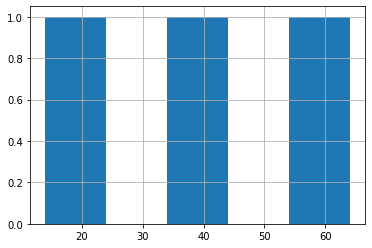

In [98]:
mount['New'].value_counts().hist(bins = 5);

### Сохранение DataFrame

In [99]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ageGroup,SurvivedTxt
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Young,Не выжил
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Young,Выжил
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young,Выжил
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young,Выжил
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Young,Не выжил


In [100]:
data.to_

AttributeError: 'DataFrame' object has no attribute 'to_'

In [101]:
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_csv.html
# разделитель sep по умолчанию запятая
# na_rep - что ставим на место пустых ячеек
# columns - какие столбцы хотим записать
# index - включать ли номер строки

data.to_csv( 'train_modified.csv', sep = ';', na_rep = '0', columns = ['Survived', 'ageGroup'], index = False )

In [102]:
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_json.html
# при сохранении в JSON может быть несколько вариантов группировки данных

# orient = index - строки имеют вид
# {"0":{"PassengerId":1,"Survived":0,"Pclass":3,"Name":"Braund, Mr. Owen Harris","Sex":"male","Age":22.0,"SibSp":1,"Parch":0,"Ticket":"A\/5 21171","Fare":7.25,"Cabin":null,"Embarked":"S","ageGroup":"Young"}

data.to_json( 'train_json_index.json', orient = 'index' )

In [103]:
# другие варианты

data.to_json( 'train_json_columns.json', orient = 'columns' )
data.to_json( 'train_json_records.json', orient = 'records' )

In [104]:
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_excel.html
# сохранение в Excel

data.to_excel( 'train_modified.xlsx', sheet_name = 'data' )

### Типовые действия с DF

In [105]:
data = pd.read_csv( 'train.csv', delimiter = ',' )
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [106]:
# выбрать все строки и подмножество столбцов

dataSelected = data.loc[:3, ['Name', 'Age', 'Cabin']]
dataSelected.head()

,Name,Age,Cabin
0,"Braund, Mr. Owen Harris",22.0,NaN
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,C85
2,"Heikkinen, Miss. Laina",26.0,NaN
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,C123


In [109]:
# добавляем к фильтру строки
# например, с третьей до последней

dataSelected = data.loc[2:15, ['Name', 'Age', 'Cabin']]
dataSelected.head()

,Name,Age,Cabin
2,"Heikkinen, Miss. Laina",26.0,NaN
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,C123
4,"Allen, Mr. William Henry",35.0,NaN
5,"Moran, Mr. James",NaN,NaN
6,"McCarthy, Mr. Timothy J",54.0,E46


### Добавить столбцы

In [112]:
# посчитаем количество слов в столбце Name
# сначала разбиваем на слова

data['nameLength'] = data['Name'].str.split(' ')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,nameLength
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"[Braund,, Mr., Owen, Harris]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"[Cumings,, Mrs., John, Bradley, (Florence, Bri..."
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"[Heikkinen,, Miss., Laina]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"[Futrelle,, Mrs., Jacques, Heath, (Lily, May, ..."
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"[Allen,, Mr., William, Henry]"


In [113]:
# добавляем подсчет количества слов

data['nameLength'] = data['Name'].str.split(' ').str.len()
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,nameLength
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,7
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,7
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,4


In [114]:
# удаляем наши вычисления

del data['nameLength']
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [115]:
# переименование столбца
# параметр inplace указывает, что надо подставить новое значение в самом DataFrame data

data.rename( columns = { 'Name': 'FIO' }, inplace=True )
data.head()

,PassengerId,Survived,Pclass,FIO,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [116]:
# можно заменить названия столбцов
# например, иногда русские названия в исходных данных доставляют трудности

data.columns = [ 'ID', 'Survived', 'Class', 'FIO', 'Gender', 'Age', 'SibSp', 'Parch', 'Ticker number', 'Fare', 'Cabin', 'Emnarked' ]
data.head()

,ID,Survived,Class,FIO,Gender,Age,SibSp,Parch,Ticker number,Fare,Cabin,Emnarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Действия со строками

In [117]:
data = pd.read_csv( 'train.csv', delimiter = ',' )
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [118]:
# выбрать нужные строки
# например, со второй по пятую

data.loc[ 0:1 ]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [119]:
# выбор с набором значений
# строки с номерами 1, 2, 3 и 44

dataNew = data.iloc[ [1, 2, 3, 44] ]

In [120]:
dataNew

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
44,45,1,3,"Devaney, Miss. Margaret Delia",female,19.0,0,0,330958,7.8792,NaN,Q


In [121]:
# индексы теперь идут не по порядку
# исправляем

dataNew.reset_index(inplace=True)

In [122]:
dataNew

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
1,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
2,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
3,44,45,1,3,"Devaney, Miss. Margaret Delia",female,19.0,0,0,330958,7.8792,NaN,Q


In [123]:
del dataNew['index']

In [124]:
dataNew

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
1,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
2,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
3,45,1,3,"Devaney, Miss. Margaret Delia",female,19.0,0,0,330958,7.8792,NaN,Q


In [125]:
# можно задать маску, по которой будут фильтроваться строки
# например, ID пассажира делится на 2

mask = ( data.PassengerId % 2 == 0 )

In [126]:
mask[:5]

0    False
1     True
2    False
3     True
4    False
Name: PassengerId, dtype: bool

In [128]:
data.loc[ mask ].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [129]:
data[ data.PassengerId % 2 == 0 ].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Работа с пустыми значениями

In [130]:
data = pd.read_csv( 'train.csv', delimiter = ',' )
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [131]:
# В столбце Age довольно много пустых значений
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [132]:
# посмотрим что это за строки

data.loc[ pd.isnull( data['Age'] ) ].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [133]:
# если надо исключить условие, то ставим тильду:

data.loc[ ~pd.isnull( data['Age'] ) ].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [134]:
# заменим пустые значения столбца Age на медиану

medianAge = data['Age'].median()
medianAge

28.0

In [135]:
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html

data['Age'].fillna( medianAge, inplace = True )

In [136]:
# итак, значение для строки с индексом 5 (было NaN) заменено на среднее

data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Сортировка

In [137]:
# сортировка по индексу
data.sort_index( ascending = False ).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.45,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S


In [138]:
# сортировка по значениям
data.sort_values( by = 'Age', ascending = False ).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q


In [140]:
# сортировка по значениям нескольких столбцов
data.sort_values( by = ['Sex', 'Age'], ascending = [True, False] )

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.00,1,0,13502,77.9583,D7,S
483,484,1,3,"Turkula, Mrs. (Hedwig)",female,63.00,0,0,4134,9.5875,NaN,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.00,0,0,113572,80.0000,B28,NaN
366,367,1,1,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",female,60.00,1,0,110813,75.2500,D37,C
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.00,0,0,113783,26.5500,C103,S
195,196,1,1,"Lurette, Miss. Elise",female,58.00,0,0,PC 17569,146.5208,B80,C
268,269,1,1,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.00,0,1,PC 17582,153.4625,C125,S
772,773,0,2,"Mack, Mrs. (Mary)",female,57.00,0,0,S.O./P.P. 3,10.5000,E77,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.00,0,1,11767,83.1583,C50,C
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.00,0,0,248706,16.0000,NaN,S


### Агрегация и группировка

In [ ]:
data = pd.read_csv( 'train.csv', delimiter = ',' )
data.head()

In [ ]:
# число непустых строк в DataFrame
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.count.html

data.count()

In [ ]:
# для отдельного столбца

data['Age'].count()

In [ ]:
# сумма
data.sum()

In [ ]:
# среднее значение
data.mean()

In [ ]:
# комбинация функций
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.aggregate.html

data.aggregate( ['sum', 'mean'] )

In [ ]:
# агрегация по столбцам (agg - синоним aggregate)

data.agg( { 'Age': ['mean'], 'Survived': ['mean', 'sum'] } )

In [ ]:
# группировка по столбцу с вычислением среднего

data.groupby( 'Sex' ).mean().reset_index()

In [ ]:
# группировка по нескольким столбцам одновременно

data.groupby( ['Sex', 'Age'] ).mean()

### Объединение DataFrame

Merge - аналог JOIN в SQL

In [ ]:
# заведем два DataFrame

df1 = pd.DataFrame( {
    'key1': ['one', 'two', 'three', 'only1'],
    'value': [1, 2, 3, 4]
} )

In [ ]:
df1

In [ ]:
df2 = pd.DataFrame( {
    'key2': ['one', 'two', 'three', 'only2'],
    'value': [11, 12, 13, 14]
} )

In [ ]:
df2

In [ ]:
# сохраняем все значения ключей, которые есть в df1
# если нужно несколько столбцов, то пишем left_on = ['key1', ...] и right_on = ['key2', ...]

df1.merge( df2, how = 'left', left_on = 'key1', right_on = 'key2' )

In [ ]:
# сохраняем все значения ключей, которые есть в df2

df1.merge( df2, how = 'right', left_on = 'key1', right_on = 'key2' )

In [ ]:
# сохраняем все значения ключей (объединение)

df1.merge( df2, how = 'outer', left_on = 'key1', right_on = 'key2' )

In [ ]:
# сохраняем только общие значения ключей

df1.merge( df2, how = 'inner', left_on = 'key1', right_on = 'key2' )

Concat - совмещение DataFrame

In [ ]:
# объединение DataFrame путем обычного "склеивания"
pd.concat( [df1, df2] )

In [ ]:
# горизонтальное объединение
pd.concat( [df1, df2], axis = 1 )

Join - объединение по индексу

In [ ]:
df1 = pd.DataFrame( {
    'key1': ['one', 'two', 'three', 'only1'],
    'value': [1, 2, 3, 4]
    },
    index = ['0', '1', '2', '3'])

In [ ]:
df1

In [ ]:
df2 = pd.DataFrame( {
    'key2': ['one', 'two', 'three', 'only2'],
    'value': [11, 12, 13, 14]
    },
    index = ['2', '3', '4', '5'])

In [ ]:
df2

In [ ]:
# для join надо указать lsuffix и rsuffix

df1.join( df2, how = 'left', lsuffix = '_df1', rsuffix = '_df2' )